In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.neural_network import MLPClassifier
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
from sklearn.impute import SimpleImputer

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
survivors_count = train_df[train_df['Survived'] == 1]['Survived'].count()
victims_count = train_df[train_df['Survived'] == 0]['Survived'].count()

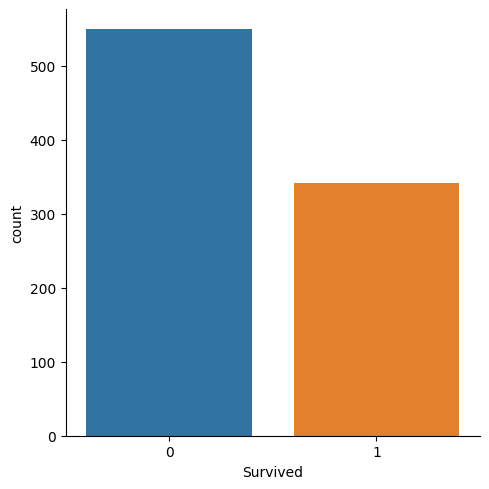

In [4]:
sns.catplot(train_df, x='Survived', kind='count')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
label_encoder = LabelEncoder()
to_encode_features = ['Sex', 'Ticket', 'Cabin', 'Embarked']

In [7]:
for feature in to_encode_features:
    train_df[feature] = label_encoder.fit_transform(train_df[feature])
    test_df[feature] = label_encoder.fit_transform(test_df[feature])

In [8]:
target = 'Survived'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_df_Y = train_df[target]
train_df_X = train_df[features]
train_df_X = pd.DataFrame(imputer.fit_transform(train_df_X), columns=features)

imputer_test = SimpleImputer(missing_values=np.nan, strategy='mean')
test_df_X = test_df[features]
test_df_X = pd.DataFrame(imputer_test.fit_transform(test_df_X), columns=features)

In [9]:
test_df_X.shape

(418, 9)

# Raw data classification
First I will run all the classifiers with the raw data to further prove that scaling and preprocessing the data we can obtain better results

## KNN Classifier

In [10]:
KNNclassifier = KNeighborsClassifier(n_neighbors=3)

In [11]:
KNNclassifier.fit(train_df_X, train_df_Y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
KNNclassifier.score(train_df_X, train_df_Y)

0.8316498316498316

In [13]:
knn_predict = KNNclassifier.predict(test_df_X)

## SVM Classifier

For Support Vector Classifiers it is important to know the structure of the data. The configuration of the SVC depends in the data structure, wether the data is linearly or non-linearly separable is important for the configuration choices.
We can use PCA in order to make a 2D visualization that will help us to understand the data structure visually.

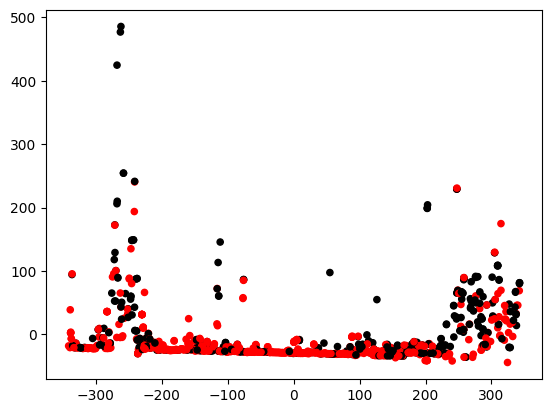

In [15]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(train_df_X), columns=["comp1", "comp2"])

colors = np.where(train_df_Y > 0, 'k', 'r')
plt.scatter(reduced_X['comp1'], reduced_X['comp2'], s=20, c=colors)

What we did was to reduce the features dimensionality to 2 components and paint them in the scatter plot based on wether they survived or not.
**As we can see, the data seems to be non-linear which in practice suggests that it would be better to use non-linear kernels such as RBF**

In [16]:
svm = SVC()
svm_result = svm.fit(train_df_X, train_df_Y)
svm_result.score(train_df_X, train_df_Y)

0.6846240179573513

In [17]:
svm_predict = svm_result.predict(test_df_X)

## SGD
Stochastic Gradient Descent is an algorithm based on gradient descent learning, this is, iterate through the labeled data and updating the model weights ind order to reach an optimal value that minimizes a defined loss function. For learning purposes we will implement it but in practice with a hinge loss it is equivalent to a SVM algorithm as the sklearn documentation specifies: https://scikit-learn.org/stable/modules/sgd.html#classification

In [18]:
sgd = SGDClassifier(loss='hinge', penalty='l2')
sgd_fit = sgd.fit(train_df_X, train_df_Y)
sgd_fit.score(train_df_X, train_df_Y)

0.5768799102132436

In [19]:
sgd_results = sgd_fit.predict(test_df_X)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## Decision Tree
Decision tree's classifiers use if-then-else sequential question on the dataset in order to gain general knowledge about the data distribution, being a non-linear algorithm, is more suitable for our problem.

In [20]:
dt = tree.DecisionTreeClassifier()
fit_tree = dt.fit(train_df_X, train_df_Y)
dt.score(train_df_X, train_df_Y)

0.9988776655443322

In [21]:
dt_pred = dt.predict(test_df_X)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

We can see that the decision tree gets 100% accuracy, something rare, and probably indicating that the tree is overfitting the data, in any case seems to be the algorith that achieves the best result

## Random Forest
Random forest basically is a collection of decison trees that throw results and the random forest try to mix the result and get the better output.

In [22]:
rfc = RandomForestClassifier()
rfc_fit = rfc.fit(train_df_X, train_df_Y)
rfc_fit.score(train_df_X, train_df_Y)

0.9988776655443322

In [23]:
rfc_pred = rfc_fit.predict(test_df_X)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

## Neural Network
Neural networks is the mainstream in machine learning, its a composition of functions separated in layers which interconnect using a layer output as input for the next layer, in the final layer can use an activation function to output a result, in the binary case we want to use sigmoid function which will always output a number between 0 and 1.

We will use pytorch as deep learning framework

In [24]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [25]:
total_samples = train_df_X.shape[0]
train_split = int(0.7 * total_samples)
dev_split = total_samples - train_split

In [26]:
X_train = torch.tensor(train_df_X[:train_split].values)
Y_train = torch.tensor(train_df_Y[:train_split].values).float()
X_dev = torch.tensor(train_df_X[dev_split:].values)
Y_dev = torch.tensor(train_df_Y[dev_split:].values).float()

In [27]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(9, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.net(input)

In [28]:
def train(x, y, model, optimizer, loss_fn):
    model.train()

    loss_acum = 0
    for i in range(len(x)):
        pred = model(x[i].float())
        label = torch.tensor([y[i]]).float()

        loss = loss_fn(pred, label)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()

        loss_acum += loss.item()

    avg_loss = loss_acum / len(x)
    return loss_acum, avg_loss

In [29]:
def test(x, y, model, loss_fn):
    model.eval()

    loss_acum = 0
    correct = 0
    with torch.no_grad():
        for i in range(len(x)):
            pred = model(x[i].float())
            true_label = torch.tensor([y[i]]).float()

            test_loss = loss_fn(pred, true_label)
            loss_acum += test_loss.item()
            if pred.round() == true_label:
                correct += 1

    avg_loss = loss_acum / len(x)
    accuracy = correct / len(x)

    return avg_loss, accuracy

In [30]:
model = SimpleNet().to(device)
print(model)

loss_fn = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=0.001)

for i in range(1000):
    
    loss_acum, avg_loss = train(X_train, Y_train, model, optimizer, loss_fn)
    test_loss, acc = test(X_dev, Y_dev, model, loss_fn)
    if i % 20 == 0:
        print(f"epoch {i} " + "="*70)    
        print(f"Train acumulated loss: {loss_acum} -- Train average loss: {avg_loss}")
        print(f"Test loss: {test_loss} -- Test accuracy: {acc}")

SimpleNet(
  (net): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
epoch 0 ======================================================================
Train acumulated loss: 467.94719765824266 -- Train average loss: 0.7511190973647555
Test loss: 0.6069673270728576 -- Test accuracy: 0.6966292134831461
epoch 20 ======================================================================
Train acumulated loss: 391.4985389560461 -- Train average loss: 0.628408569752883
Test loss: 0.5603023470464622 -- Test accuracy: 0.7351524879614767
epoch 40 ======================================================================
Train acumulated loss: 382.2421181201935 -- Train average loss: 0.6135507513967793
Test loss: 0.5524027645259043 -- 

## Neural net results
We can see that the most basic neural net implementation (no batch training nor regularization nor complex layers) can achieve a 78% accuracy on data never seen by the network

# Data Scaling
We have seen the result for practically the raw data. It is common in machine learning to standardize and normalize inputs. Normalizing helps with the scale of the input, all features should be in the same scale (something like "play with the same rules"). All different models use maths to extract pattern and predictions from the input data, this operations can be heavily distorsionated if the inputs are not in the same scale. It is the model who with training should update parameters in order to assign weights to different features.

It is helpful knowing the datadistribution of each feature for chosing a scaling method.

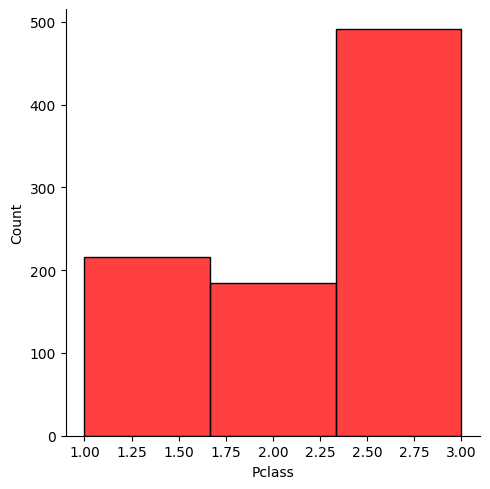

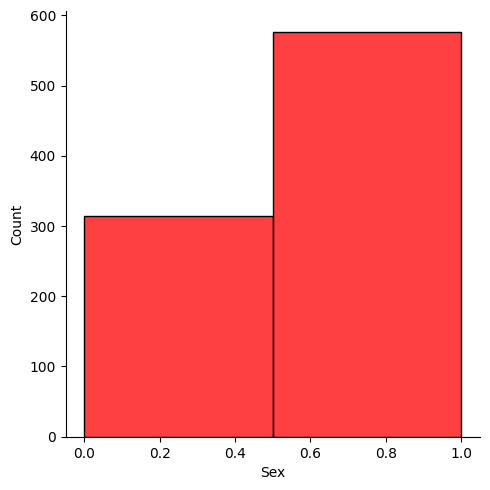

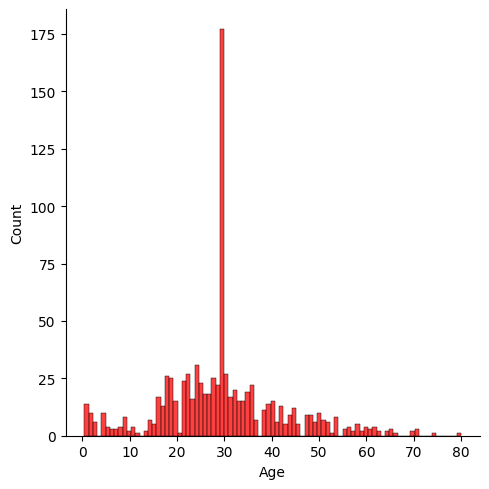

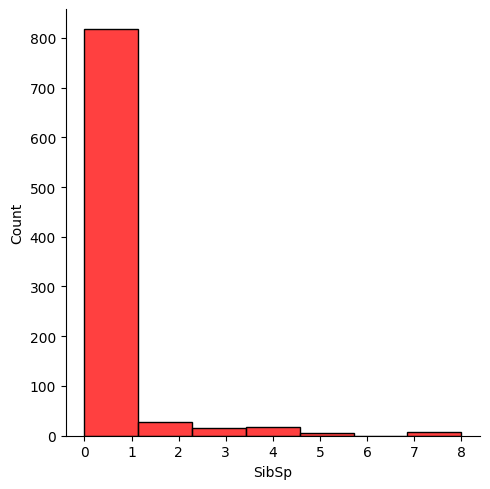

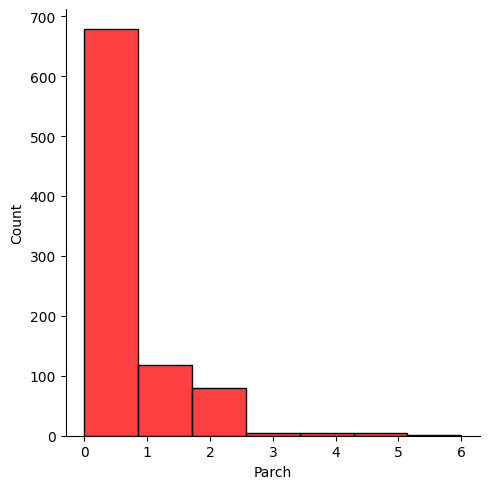

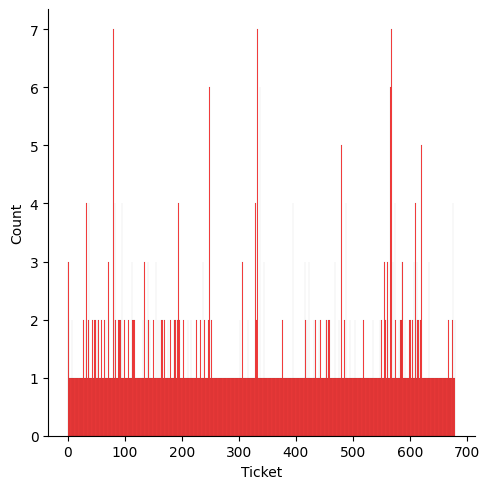

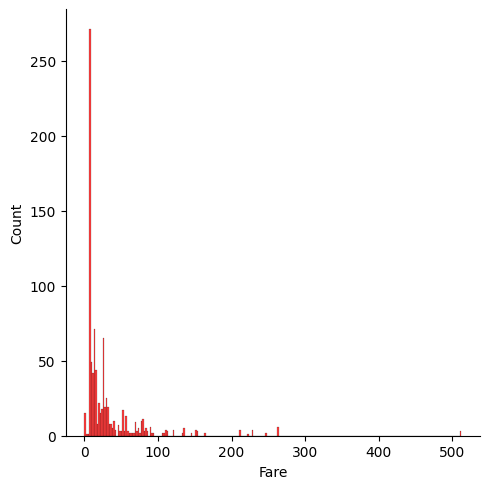

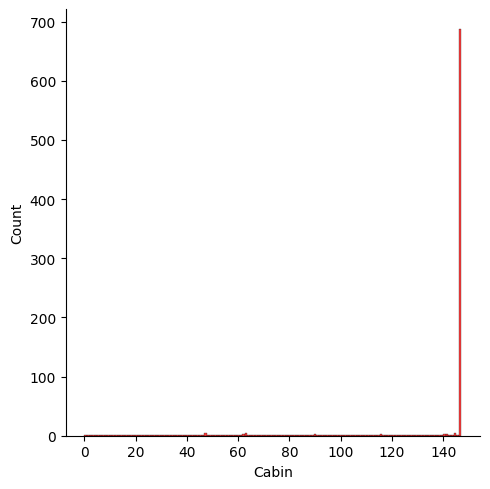

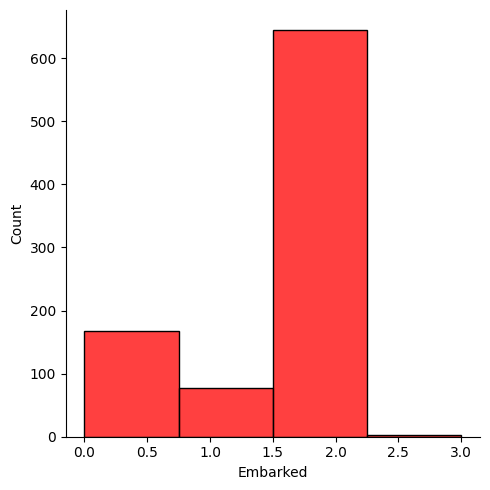

In [31]:
for column in train_df_X.columns:
    sns.displot(train_df_X[column], kde=False, color='red', bins=len(train_df_X[column].unique()))

We can see how only age feature is representing a normal distribution which is a perfect distribution to apply data standardization. There are some features that represent label encoders so it difficultly can be shaped as normal distribution. Anyways this features must keep the label encoding so we should not apply standardization to this features.

In [32]:
to_scale_features = ['Age', 'Fare', 'Cabin', 'Ticket']

In [33]:
scaler = StandardScaler()

In [34]:
train_df_X[to_scale_features] = scaler.fit_transform(train_df_X[to_scale_features])
test_df_X[to_scale_features] = scaler.fit_transform(test_df_X[to_scale_features])

Now we will reply the sequence of algorithms but with standardized data and check if there is any improvement.

## KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
fit_X = knn.fit(train_df_X, train_df_Y)
fit_X.score(train_df_X, train_df_Y)

0.8754208754208754

In [36]:
knn_scaled_pred = fit_X.predict(test_df_X)

It improved from 83% accuracy to 88% accuracy on training data

## SVM Classifier
Standardization also helps in algorithms such as PCA where data distribution is a core concept. We will then apply PCA to the scaled dataset and plot the result, just to see the difference with the unscaled data plot.

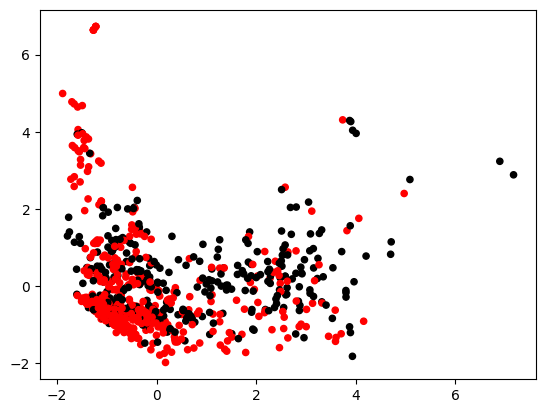

In [37]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(train_df_X), columns=["comp1", "comp2"])

colors = np.where(train_df_Y > 0, 'k', 'r')
plt.scatter(reduced_X['comp1'], reduced_X['comp2'], s=20, c=colors)

Now we can extract some information from the plot, the data is more densely distributed and we can see that most of the red dots accumulate at the left of the plot while the black dots are more centered

In [38]:
svm = SVC()
svm_fit = svm.fit(train_df_X, train_df_Y)
svm_score = svm_fit.score(train_df_X, train_df_Y)
svm_score

0.8338945005611672

In [39]:
svm_scaled_pred = svm_fit.predict(test_df_X)

Here the improvement is even better, we go from 67% acc to 82,7%

## SGD

In [40]:
sgd = SGDClassifier(loss='hinge', penalty='l2')
sgd_fit = sgd.fit(train_df_X, train_df_Y)
sgd_score = sgd.score(train_df_X, train_df_Y)
sgd_score

0.7755331088664422

In [41]:
sgd_scale_pred = sgd.predict(test_df_X)

## Decision tree

In [42]:
dt = tree.DecisionTreeClassifier()
dt_fit = dt.fit(train_df_X, train_df_Y)
dt_score = dt.score(train_df_X, train_df_Y)
dt_score

0.9988776655443322

In [43]:
dt_scaled_pred = dt.predict(test_df_X)

## Random forest

In [44]:
rf = RandomForestClassifier()
rf_fit = rf.fit(train_df_X, train_df_Y)
rf_score = rf.score(train_df_X, train_df_Y)
rf_score

0.9988776655443322

In [45]:
rf_scale_pred = rf.predict(test_df_X)

## Neural network

In [46]:
X_train = torch.tensor(train_df_X[:train_split].values)
Y_train = torch.tensor(train_df_Y[:train_split].values).float()
X_dev = torch.tensor(train_df_X[dev_split:].values)
Y_dev = torch.tensor(train_df_Y[dev_split:].values).float()

X_test = torch.tensor(test_df_X.values) 

In [47]:
model = SimpleNet().to(device)
print(model)

loss_fn = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=0.001)

for i in range(1000):
    
    loss_acum, avg_loss = train(X_train, Y_train, model, optimizer, loss_fn)
    test_loss, acc = test(X_dev, Y_dev, model, loss_fn)
    if i % 20 == 0:
        print(f"epoch {i} " + "="*70)    
        print(f"Train acumulated loss: {loss_acum} -- Train average loss: {avg_loss}")
        print(f"Test loss: {test_loss} -- Test accuracy: {acc}")

SimpleNet(
  (net): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
epoch 0 ======================================================================
Train acumulated loss: 421.2560770511627 -- Train average loss: 0.6761734784127813
Test loss: 0.673039836542947 -- Test accuracy: 0.6003210272873194
epoch 20 ======================================================================
Train acumulated loss: 344.0744599699974 -- Train average loss: 0.5522864526003168
Test loss: 0.5261294512888401 -- Test accuracy: 0.7656500802568218
epoch 40 ======================================================================
Train acumulated loss: 275.7981560297776 -- Train average loss: 0.4426936693896912
Test loss: 0.421666265184278 -- Te

In [48]:
def predict_dataset(X, model):
    size = X.shape[0]
    pred_tensor = torch.zeros(size)
    
    for i, row in enumerate(X):
        pred = model(row.float())
        int_pred = 0 if pred < .5 else 1
        pred_tensor[i] = int(int_pred)

    return pred_tensor.int()

In [49]:
nn_scaled_pred = predict_dataset(X_test, model)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [50]:
test_df.shape

(418, 11)

In [51]:
preds = [knn_scaled_pred, svm_scaled_pred, dt_scaled_pred, rf_scale_pred, sgd_scale_pred, nn_scaled_pred]

initial_pass_id = 892
final_pass_id = initial_pass_id + test_df.shape[0]

(initial_pass_id, final_pass_id)

(892, 1310)

In [52]:
pass_id_tensor = torch.arange(initial_pass_id, final_pass_id, 1).reshape(-1, 1)

In [53]:
solutions_df = []
for pred in preds:
    pred = torch.tensor(pred.reshape(-1, 1), dtype=torch.int)
    submission_tensor = torch.cat((pass_id_tensor, pred), 1)
    solutions_df.append(pd.DataFrame(submission_tensor, columns=['PassengerId', 'Survived']))

/tmp/ipykernel_16183/2305555702.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(pred.reshape(-1, 1), dtype=torch.int)


In [54]:
solutions_name = ['knn', 'svm', 'decision_tree', 'random_forest', 'sgd', 'neuralnet']

for i, sol in enumerate(solutions_df):
    sol.to_csv(f"solution_{solutions_name[i]}.csv", header=True, index=False)

# Kaggle Results
Here we show the results obtained in the titanic kaggle competition for each model (standardized)

|Model|Score|
|:----:|:----:|
|KNN|0.732|
|SVM|0.775|
|SGD|0.717|
|Random Forest|0.779|
|Decision Tree|0.708|
|Neural Net|0.754|